In [6]:
import matplotlib.pylab as plt
import numpy as np

import random

# Building kmeans algorithm from scratch
- This notebook is inspired by this youtube video: https://www.youtube.com/watch?v=xKZHH-UOsUM


# Learning step of kmeans

1. Determine k as a hyper parameter which represents the number of clusters.
2. Randomly assign cluster k fo every sample.
    - Or, randomly sample k samples as centroids of k-clusters.
    - Or, determine k centroids by random value (It should be noted that the centroid determined by random numbers may be an outlier, and no single sample belonging to this centroid may be created.)
3. Calculate (and update) centroid (Euclidian distance)
4. Re-assign cluster
5. Repeat 3 and 4 for MAX_ITERATION times and finally get clusters.

Cost function of kmeans:  
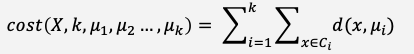


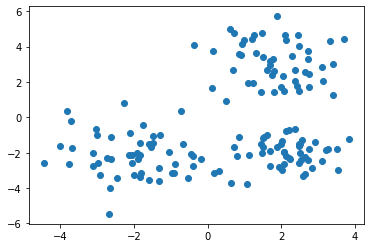

In [7]:
a = np.random.multivariate_normal([-2, -2], [[1.0, 0], [0, 1.0]], 50).T
b = np.random.multivariate_normal([2, -2], [[0.5, 0], [0, 0.5]], 50).T
c = np.random.multivariate_normal([2, 3], [[1.0, 0], [0, 1.5]], 50).T
X = np.hstack([a, b, c])
plt.scatter(X[0], X[1])

In [9]:
def distance(u, v):
    return np.linalg.norm(u-v)

def calcurate_centroid(points):
    return np.mean(points, axis=0)


def get_closest_cluster(pt, centroids):
    min_dist = float('inf')
    label = 0
    for i, center in enumerate(centroids):
        dist = distance(center, pt)
        if dist < min_dist:
            min_dist = dist
            label = i
    return label

def k_means(points, k, max_error=0.01, max_iteration=1000):
    # Initialize centroid
    centroids = [points[random.randint(0, len(points))] for _ in range(k)]
    clsuters = {}
    for i in range(0, k):
        clsuters[i] = []

    # While not converged
    while max_iteration > 0:
        max_iteration -= 1
        # Assign each point to its nearest centroid's cluster
        for pt in points:
            i = get_closest_cluster(pt, centroids)
            clsuters[i].append(pt)
        
        # Recalculate each centroid to cluster mean
        for i in range(k):
            centroids[i] = calcurate_centroid(clsuters[i])
    
    # return assignment
    res = [get_closest_cluster(pt, centroids) for pt in points]
    return res

    
points = X.T
res = k_means(points, k=3)

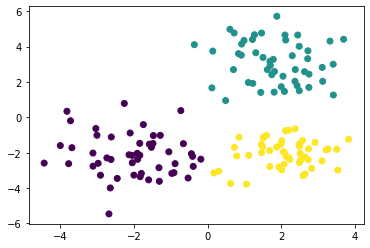

In [10]:
plt.scatter(X[0], X[1], c=res)


# Pros and cons
- Pros
    - Simple and scalable to large dataset.
    - Guarantees convergence.
    - Easy to adapt new examples.
- Cons
    - Spherical assumptions.
        - See 'sklearn_kmeans_iris.ipynb'. It describes an example where the kmeans algorithm does not work well due to this assumption.
    - Sensitive to outliers.
    - Biased by initial value (so sometimes it doesn't work well)